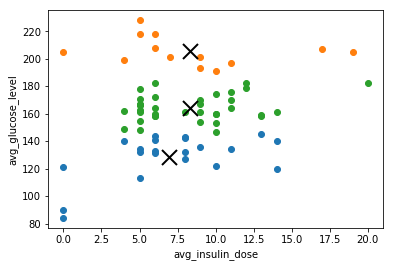

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.mixture import GaussianMixture as GM

def mean(l):
    if(len(l) == 0):
        return 0
    return sum(l) / len(l)

base_uri = "C:/Chang/NEU/courses/cs6220 datamining/project/Diabetes-Data/data-"

patient_avg_glucose = list()
patient_avg_insulin_dose = list()

for i in range(1, 71, 1):
    if (i < 10):
        uri = base_uri + "0" + str(i)
    else:
        uri = base_uri + str(i)
    
    with open(uri) as f:
        lines = f.readlines()
        glu_measure = list()
        reg_insulin_dose = list()
        
        for line in lines:
            items = line.strip().split()
            if(items[2] >= '33' and items[2] <= '35'):
                reg_insulin_dose.append(float(items[3]))
            if(items[2] >= '57' and items[2] <='64' and items[3].isnumeric()):
                glu_measure.append(int(items[3]))
    f.close()
    patient_avg_glucose.append(mean(glu_measure))
    patient_avg_insulin_dose.append(mean(reg_insulin_dose))

# Prepare data for K means
data = np.array([[x, y] for x, y in zip(patient_avg_insulin_dose, patient_avg_glucose)], np.int32)

# Apply K means
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    plt.xlabel("avg_insulin_dose")
    plt.ylabel("avg_glucose_level")
plt.show()

# # GMM
# gmm = GM(n_components=2).fit(data)
# labels = gmm.predict(data)
# plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');
# plt.show()
    
# # Write result to output file
# outputPath = "C:/Chang/NEU/courses/cs6220 datamining/project/patient_data.dat"
# with open(outputPath, "w") as w:
#     for x, y in zip(patient_avg_glucose, patient_avg_insulin_dose):
#         w.write("{},{}\n".format(x, y))
# w.close()


The dataset contains insulin dose and glucose measurement data of 70 patients (stored in 70 files) over several weeks or months. We processed the files and calculated the average insulin dose and average glucose level for each patient and performed k-means clustering on the result. As shown above, there are roughly 3 clusters, glucose_level < 150, glucose_level between 150 and 200, and glucose_level > 200.

For diabetes treatment, "it would be very desirable to keep 90% of all blood glucose (BG) measurements < 200 mg/dl and that the average BG should be 150 mg/dl or less. ...Conversely, an average BG > 200 (over several years) is associated with a poor long-term outcome." (from Domain-Description)